<a href="https://colab.research.google.com/github/ieconomy1/CIP-Geospatial-example/blob/main/CIP5_Student_Data_Tyrell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

## UCI ML Repo: https://archive.ics.uci.edu/datasets
UCI ML Repo is a place where a lot of the most popular dataset used for teaching and experimenting with data science techniques are housed. It is totally free, and even better for budding data scientists -- totally python compatible! It has hundreds of real-world datasets and they span a ton of different topics like education, healthcare, finance, and social science to name a few. Each dataset(usually) contains a description and something called metadata, which is data ***about*** data. If data was a book, metadata could be thought of as the table of contents.

It tells you things like:
- What each column means
- What type of data it is(number? category)
- How many rows or columns in the dataset
- Where the data comes from(source, license, etc.)

The UCI ML Repo is used widely by students, researchers, and people like us to practice data cleaning, analysis, visualization, and predictive modeling. Today, we'll be using the [Student Performance](https://colab.research.google.com/drive/1bP-XikHFB7WdYLOCNjeUUw-KTeNA3IC-#scrollTo=zBt7rARfvCta&line=12&uniqifier=1) dataset

## Import necessary libraries and install UCI ML Repo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
warnings.filterwarnings('ignore')
!pip install ucimlrepo

## Fetch the UCI Machine Learning Repo

In [2]:
from ucimlrepo import fetch_ucirepo

## Get the dataset and put it in a dataframe. More on dataframes below, for the curious code in placer!

 A Pandas dataframe can be thought of -- for our sake here --  as a spreadsheet in code. It looks like a table, with:
 - **Rows** representing individual observations. (like one student per row)
 - **Columns** representing different variables or ***features***. (like age, gender, final grades, etc.)

 You can sort dataframes, filter them, do math on them, and even visualize them! All from the comfort and security of your favorite new programming language -- Python!

In [3]:
# fetch dataset
student_performance = fetch_ucirepo(id=320)

"""
For machine learning, data is split into two parts: features(the inputs)
and targets(the outputs we want to predict)
The UCI ML Repo takes care of this for us automatically.
For the sake of data analysis, we'll put the features and targets
into one dataframe. That's all this code does.
"""
X = student_performance.data.features
y = student_performance.data.targets
df = pd.concat([X, y], axis=1)

#Set a consistent plotting style
sns.set(style="darkgrid")

First, let's look at what's IN our dataset -- it will help us formulate the questions we want to ask about the data. This is a crucial step. First, let's just look at some basic information about the data we're working with -- the names of the columns, what the data type is, how many columns there are, and whether we have any Null values that we'll need to clean up.  A quick look at the metadata at the bottom of the page [here](https://archive.ics.uci.edu/dataset/320/student+performance) will tell us what the names of the columns mean.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Because there are 649 entries, we can assume we have 649 students. Let's ask some questions about the students and create some basic plots to visualize their answers. Let's start with "How old are our students?"

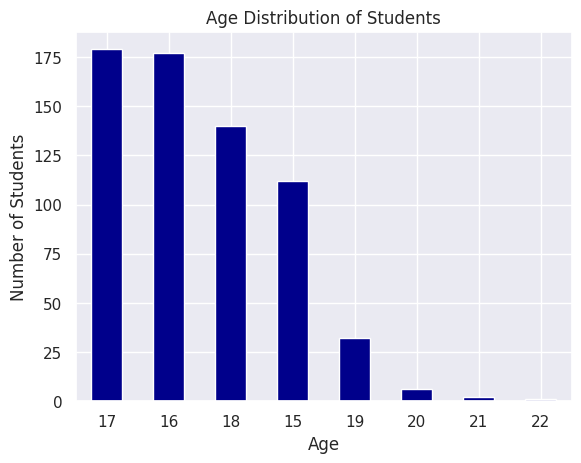

In [5]:
df['age'].value_counts().plot(kind='bar', color=['darkblue'])
plt.title('Age Distribution of Students')
plt.xlabel('Age')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.show()

We can see thta the vast majority of students in this study are between the ages of 15 and 18, with a few students being older, with one as old as 22! The oldest students might be considered what we call outliers -- values much higher or much lower than the average, and we can decide later based on the problem we'd like to solve, whether we include them in our analysis.

Next, how many students are in each school?

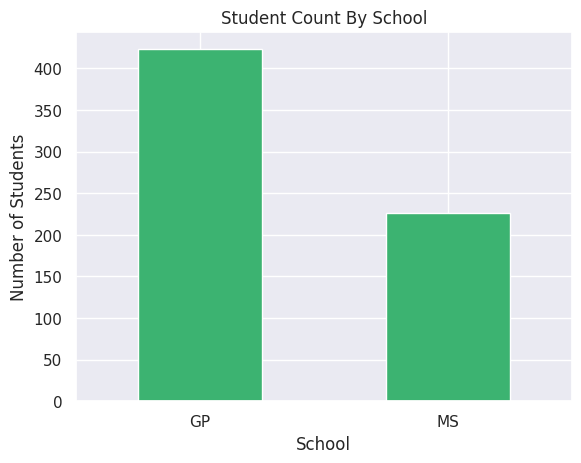

In [6]:
df['school'].value_counts().plot(kind='bar', color='mediumseagreen')
plt.title("Student Count By School")
plt.xlabel("School")
plt.ylabel("Number of Students")
plt.xticks(rotation=0)
plt.show()

We see that MS has about half as many students as GP. That might be interesting later!

How many students have internet access at home?

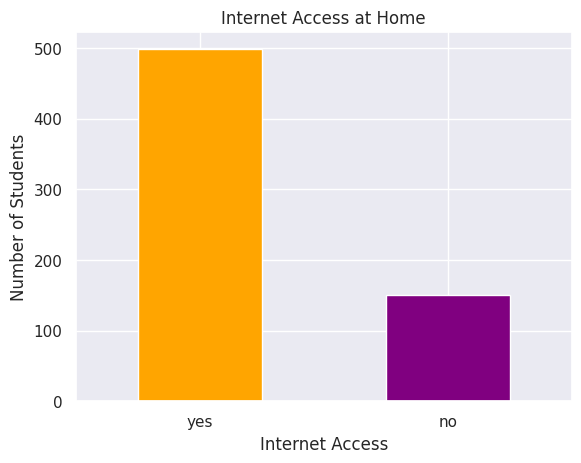

In [7]:
df['internet'].value_counts().plot(kind='bar', color=['orange', 'purple'])
plt.title('Internet Access at Home')
plt.xlabel('Internet Access')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.show()

The vast majority of students have internet at home. Hmm. I wonder if having internet correlates at all with the final grades the students have in the class. Let's see if we can figure it out with a simple bar plot.It's important to know that the grade distribution does not follow the traditional model of grades that we have here in the US. The grades will range from zero at the lowest to twenty at the highest. This is an example of some domain knowledge that we might need in order to make our analysis as robust as it can be.

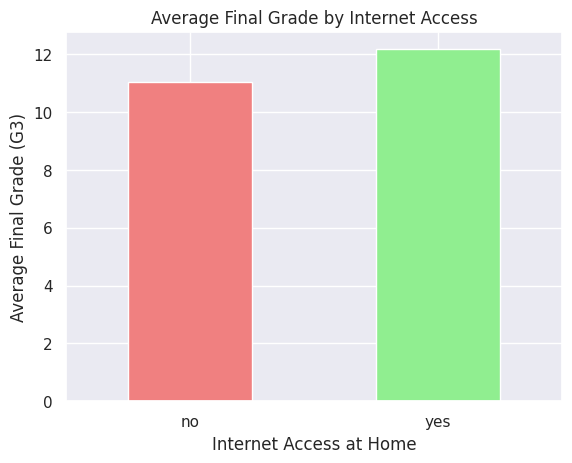

In [ ]:
# Group by internet access and compute average final grade
avg_grade_by_internet = df.groupby('internet')['G3'].mean()

# Plot
avg_grade_by_internet.plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Average Final Grade by Internet Access')
plt.xlabel('Internet Access at Home')
plt.ylabel('Average Final Grade (G3)')
plt.xticks(rotation=0)
plt.show()

First, it's important to know that the reason these grades don't stretch all the way to 20 is because we're dealing with ***averages*** not the raw grades themselves. Based on what we see in this barplot, people with internet do better than those without it, but not by a whole ton! Let's see if we can go a layer deeper.

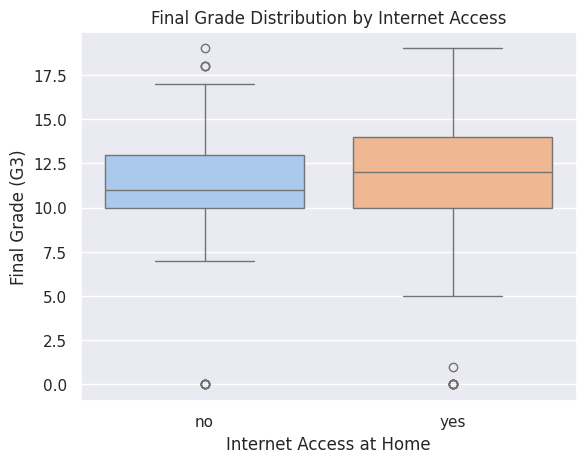

In [ ]:
sns.boxplot(x='internet', y='G3', data=df, palette='pastel')
plt.title('Final Grade Distribution by Internet Access')
plt.xlabel('Internet Access at Home')
plt.ylabel('Final Grade (G3)')
plt.show()

This is a boxplot. It's a great way to see how numbers are spread out -- like students' final grades.
- The box in the middle shows where the middle half of the students fall. You can think of it as "the average zone." Officially, it is called the interquartile range.
- The line inside the box is the median -- the middle score if you lined all the students up by grade.
- The lines sticking out from the box are, for me, what were the most confusing. They are called **whiskers** and they show ***how far the usual scores go up or down***.
- Remember earlier when I talked about outliers? That's what the little dots outside the lines are. They represent students whose grades were way higher or way lower than everyone else.

So what we can gather from this is that students with internet access had a slightly higher median grade, and a few more students scoring at the top of the group, but both groups had students who struggled as well!

Now. There are many more questions we can ask and should ask. Some of them are things like:
- Does studying actually lead to better grades?(Is there a relationship between studytime and G3?)
- Does gender affect performance?
- Do students with more free time or who go out more tend to score lower than those who do not?
- Do absences impact grades?

We can explore some of these questions with simple plots and consice code just like we have been this entire time. You don't need advanced math or to be a statistician to start getting answers. You just need some curiosity, the right dataset, and the tools to ask good questions!

For those of you itching to do some Machine Learning, here's a basic algorithm. Let's see if, given a students' first and second period grades, we can predict their final grade using a ***Linear Regression*** model. Linear regression is one of the first algorithms we learn in Machine Learning. It tries to draw a straight line through the data that best predicts the outcome. So, if we give it someone's G1 and G2 grades, we suppose that it can estimate what their G3 grade is likely to be.

***Disclaimer:*** You are unlikely to follow everything happening here, and that is both EXPECTED and OKAY. The purpose of this exercise is to whet your appetite for machine learning, and to give you a bit of insight into what the process looks like for someone practicing data science. The example has been truncated quite a bit, and there are many more steps and questions followed, asked and answered before we'd typically be ready for a ML pipeline. So please do not feel discouraged or disheartened if every piece of code does not make sense or if every plot is not intelligible, or if what the heck is happening in the code that follows is not clear. Remember, you're only about six weeks into your coding journey!

In [8]:
X=df[['G1', 'G2']] # These are the feature variables. The ones we feed into the model to give it something to train on.
Y=df['G3'] # This is the variable we are trying to predict.

In [ ]:
# We split the data into training and test sets so that the model can learn patterns
# from one portion (the training set) and evaluate how well it does on data it has
# never seen(the test set)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
'''We evaluate the model with the R squared score and the Mean Absolute Error. The R squared score
tells us how well the model explains the variation in the data. A score close to 1 means the model
is doing a great job. A score close to 0 means the model isn't doing much better than we would do if
we just...well...guessed. The mean absolute error tells us, on average, how far off the predictions
of the model are. For example, an MAE of 2.5 tells us the model is off by about 2.5 points on average(on our
20 point scale)
'''
print(f"R-squared score: {r2_score(y_test, y_pred):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.3f}")

R-squared score: 0.881
Mean Absolute Error: 0.735


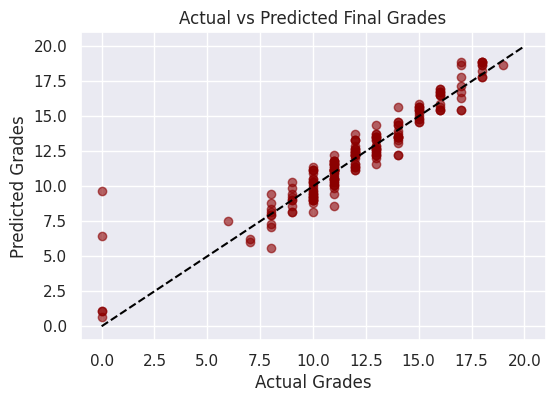

In [ ]:
# Finally, let's plot the actual vs the predicted grades.
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.6, color='darkred')
plt.plot([0, 20], [0, 20], color='black', linestyle='--')
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Actual vs Predicted Final Grades')
plt.grid(True)
plt.show()

This chart shows how well out model did. The closer any particular dot is to the line, the better the prediction. So we can see that overall, most dots are pretty close to the line, which means our model can (reasonably) predict a student's final grade using their G1 and G2 scores.

Food for thought:
- Would it be more or less useful if we were to build a model that DIDN'T use G1 and G2 grades? What if it were early in the school year,before we had the G1 and G2 scores?
- Could things like access to the internet, family support, or number of past failures influence the outcome at all? If so, how do we account for that and add this in? Just guess.
- What would we use this model for in real life? Could it help identify students at risk of failing? Could it determine who gets some more support or tutoring or resources? How could YOUR model be useful in real life?
- Is it FAIR? If we built a model that used things like parental education level or even someone's address, would it be accurate? Even if it was, would it be ethical?
- What's the risk of JUST relying on predictions?


This is just a taste of what's possible. Try adapting the code to your own questions or even your own datasets from the UCI ML repo. See what you can learn! We're all working on this together, one step at a time!